# Plot schematics of collapsing confidence intervals
This function makes some illustrative curves of uncertainty change over time. It requires no inputs. 

In [1]:
import matplotlib.pyplot as plt
from labellines import labelLines
import numpy as np

In [2]:
font = {'family' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

In [3]:
# Define some constants for the curve before obserevations
startyear = 2010
x = np.arange(startyear, 2101)
dt = x - startyear
Tstart = 1.05
fringe = 0.035
T0 = Tstart + dt * (1.26 - 0.006 * dt) / 100
Tupper = T0 + dt * 1 / 285 * (T0 - Tstart + 0.2) + fringe
Tlower = T0 - dt * 1 / 190 * (T0 - Tstart + 0.2) - fringe

In [4]:
Tupper

array([1.085     , 1.09828575, 1.11153867, 1.12475747, 1.13794091,
       1.15108772, 1.16419663, 1.17726639, 1.19029572, 1.20328337,
       1.21622807, 1.22912856, 1.24198358, 1.25479186, 1.26755214,
       1.28026316, 1.29292365, 1.30553235, 1.318088  , 1.33058933,
       1.34303509, 1.355424  , 1.36775481, 1.38002625, 1.39223705,
       1.40438596, 1.41647172, 1.42849305, 1.4404487 , 1.4523374 ,
       1.46415789, 1.47590891, 1.48758919, 1.49919747, 1.51073249,
       1.52219298, 1.53357768, 1.54488533, 1.55611467, 1.56726442,
       1.57833333, 1.58932014, 1.60022358, 1.61104239, 1.6217753 ,
       1.63242105, 1.64297839, 1.65344604, 1.66382274, 1.67410723,
       1.68429825, 1.69439453, 1.70439481, 1.71429782, 1.72410232,
       1.73380702, 1.74341067, 1.752912  , 1.76230975, 1.77160267,
       1.78078947, 1.78986891, 1.79883972, 1.80770063, 1.81645039,
       1.82508772, 1.83361137, 1.84202007, 1.85031256, 1.85848758,
       1.86654386, 1.87448014, 1.88229516, 1.88998765, 1.89755

In [20]:
# Define behaviour after observations
latertime = 2070
laterind = latertime-startyear
np.random.seed(11)
TrealisedSmooth = {
    0: Tstart + (T0-Tstart) * 1.11, 
    1: Tstart + (T0-Tstart) * 0.84
}
Trealised = {}
x2 = np.arange(latertime, 2101)
Tnewplanupper = {}
Tnewplanlower = {}
Tnewmed = {}
for ind in [0, 1]:
    Trealised[ind] = TrealisedSmooth[ind] + (np.random.rand(len(x)) - 0.5) * 0.07
    Tlaterupper = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) + (x2 - latertime) * 1 / 240 * (T0[laterind:] - T0[laterind] + 0.2) + fringe
    Tlaterlower = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) - (x2 - latertime) * 1 / 190 * (T0[laterind:] - T0[laterind] + 0.2) - fringe
    # Construct a new planned pathway
    Tnewplanupper[ind] = 2.0 + (2.0 - Tlaterupper[0]) * (x2 - 2100) / (2100 - latertime)
    Tnewplanlower[ind] = Tnewplanupper[ind] + Tlaterlower - Tlaterupper
    Tnewmed[ind] = (Tnewplanupper[ind] + Tnewplanlower[ind])/2

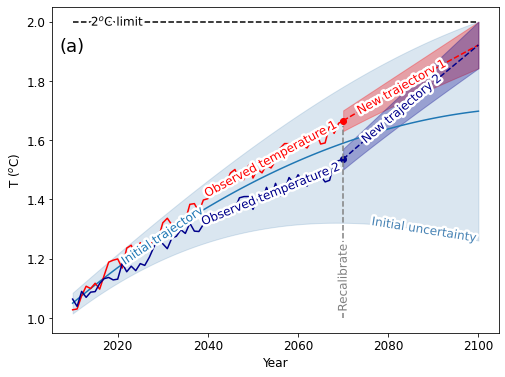

In [21]:
# Make the plots using the currently dominant method
plt.figure(figsize=(8,6))
plt.plot(x, T0, label="Initial trajectory")
plt.fill_between(x, Tupper, Tlower, alpha= 0.2, color="steelblue")
# We use invisible lines to align the text
plt.plot(x,  Tlower, alpha=0.0, label="Initial uncertainty", color="steelblue")
plt.plot(x[:laterind+1], Trealised[0][:laterind+1], color="red")
plt.scatter(latertime, Trealised[0][laterind], color="red")
plt.plot(x[:laterind+1], Trealised[1][:laterind+1], color="darkblue")
plt.plot(x[:laterind+1], TrealisedSmooth[0][:laterind+1], label="Observed temperature 1", color="red", alpha=0.0)
plt.plot(x[:laterind+1], TrealisedSmooth[1][:laterind+1], label="Observed temperature 2", color="darkblue", alpha=0.0)
plt.scatter(latertime, Trealised[1][laterind], color="darkblue")

plt.xlabel("Year")
plt.ylabel("T ($^o$C)")
plt.plot([2010, 2100], [2, 2], linestyle="--", color="black", label="2$^o$C limit")
plt.fill_between(x2, Tnewplanupper[0], Tnewplanlower[0], alpha=0.3, color="red")
plt.plot(x2, Tnewmed[0], linestyle="--", color="red", label="New trajectory 1")
plt.fill_between(x2, Tnewplanupper[1], Tnewplanlower[1], alpha=0.3, color="darkblue")
plt.plot(x2, Tnewmed[1], linestyle="--", color="darkblue", label="New trajectory 2")
plt.plot([latertime, latertime+0.00001], [1, TrealisedSmooth[0][laterind]], color="grey", linestyle="--", label="Recalibrate")
lines = plt.gca().get_lines()
labelLines(lines[:2], align=True, xvals=[2030, 2088])
labelLines(lines[4:6], align=True, xvals=[2054, 2054])
labelLines(lines[6:], align=True, xvals=[2020, 2083, 2083, latertime+0.0000021])
plt.text(2007, 1.9, "(a)", fontsize=18)
plt.savefig("./output/ConfidenceWindowEvolutionFig.png", dpi=300, bbox_inches='tight')

In [7]:
# Construct pathways with median temperature conserved
for ind in [0, 1]:
    Trealised[ind] = TrealisedSmooth[ind] + (np.random.rand(len(x)) - 0.5) * 0.07
    Tlaterupper = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) + (x2 - latertime) * 1 / 280 * (T0[laterind:] - T0[laterind] + 0.2) + fringe
    Tlaterlower = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) - (x2 - latertime) * 1 / 190 * (T0[laterind:] - T0[laterind] + 0.2) - fringe
    # Construct a new planned pathway
    Tnewplanupper[ind] = 1.78 + (1.78 - Tlaterupper[0]) * (x2 - 2100) / (2100 - latertime)
    Tnewplanlower[ind] = Tnewplanupper[ind] + Tlaterlower - Tlaterupper
    Tnewmed[ind] = (Tnewplanupper[ind] + Tnewplanlower[ind])/2

C:\Users\rlamboll\Anaconda3\envs\silicone-3\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child3), but could not find a label for it.
  warnings.warn(
C:\Users\rlamboll\Anaconda3\envs\silicone-3\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


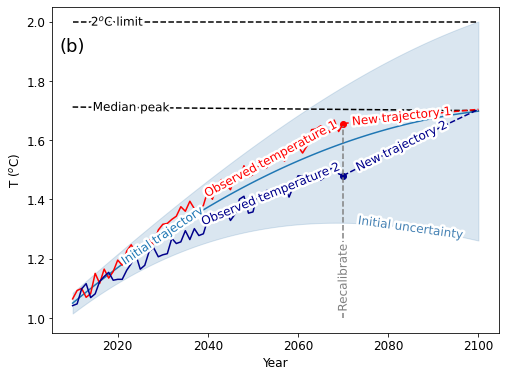

In [17]:
# Plot these
plt.figure(figsize=(8,6))
plt.plot(x, T0, label="Initial trajectory")
plt.fill_between(x, Tupper, Tlower, alpha= 0.2, color="steelblue")
# We use invisible lines to align the text
plt.plot(x,  Tlower, alpha=0.0, label="Initial uncertainty", color="steelblue")
plt.plot(x[:laterind+1], Trealised[0][:laterind+1], color="red")
plt.scatter(latertime, Trealised[0][laterind], color="red")
plt.plot(x[:laterind+1], Trealised[1][:laterind+1], color="darkblue")
plt.plot(x[:laterind+1], TrealisedSmooth[0][:laterind+1], label="Observed temperature 1", color="red", alpha=0.0)
plt.plot(x[:laterind+1], TrealisedSmooth[1][:laterind+1], label="Observed temperature 2", color="darkblue", alpha=0.0)
plt.scatter(latertime, Trealised[1][laterind], color="darkblue")

plt.xlabel("Year")
plt.ylabel("T ($^o$C)")
plt.plot([2010, 2100], [2, 2], linestyle="--", color="black", label="2$^o$C limit")
plt.plot([2010, 2100], [1.712, 1.7], linestyle="--", color="black", label="Median peak")
plt.plot(x2, Tnewmed[0], linestyle="--", color="red", label="New trajectory 1")
plt.plot(x2, Tnewmed[1], linestyle="--", color="darkblue", label="New trajectory 2")
plt.plot(
    [latertime, latertime+0.00001], 
    [1, TrealisedSmooth[0][laterind]], 
    color="grey", linestyle="--", label="Recalibrate"
)
lines = plt.gca().get_lines()
labelLines(lines[:2], align=True, xvals=[2030, 2085])
labelLines(lines[2:6], align=True, xvals=[2054, 2054])
labelLines(lines[6:], align=True, xvals=[2020, 2023, 2083, 2083, latertime+0.0000021])
plt.text(2007, 1.9, "(b)", fontsize=18)
plt.savefig("./output/ConfidenceWindowEvolutionFig_medianTemp.png", dpi=300, bbox_inches='tight')

In [9]:
TrealisedSmooth[0]

array([1.05     , 1.0639194, 1.0777056, 1.0913586, 1.1048784, 1.118265 ,
       1.1315184, 1.1446386, 1.1576256, 1.1704794, 1.1832   , 1.1957874,
       1.2082416, 1.2205626, 1.2327504, 1.244805 , 1.2567264, 1.2685146,
       1.2801696, 1.2916914, 1.30308  , 1.3143354, 1.3254576, 1.3364466,
       1.3473024, 1.358025 , 1.3686144, 1.3790706, 1.3893936, 1.3995834,
       1.40964  , 1.4195634, 1.4293536, 1.4390106, 1.4485344, 1.457925 ,
       1.4671824, 1.4763066, 1.4852976, 1.4941554, 1.50288  , 1.5114714,
       1.5199296, 1.5282546, 1.5364464, 1.544505 , 1.5524304, 1.5602226,
       1.5678816, 1.5754074, 1.5828   , 1.5900594, 1.5971856, 1.6041786,
       1.6110384, 1.617765 , 1.6243584, 1.6308186, 1.6371456, 1.6433394,
       1.6494   , 1.6553274, 1.6611216, 1.6667826, 1.6723104, 1.677705 ,
       1.6829664, 1.6880946, 1.6930896, 1.6979514, 1.70268  , 1.7072754,
       1.7117376, 1.7160666, 1.7202624, 1.724325 , 1.7282544, 1.7320506,
       1.7357136, 1.7392434, 1.74264  , 1.7459034, 